In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import random

Em um modelo autoregressivo o valor atual depende dos valores passados da própria série. Um **Modelo Autoregressivo Geral (Ordem p)** é formulado como:

$$Z_t = \phi_tZ_{t-1} + \phi_2Z_{t-2} + \dots + \phi_pZ_{t-p} + \epsilon_t$$

Onde:

* $Z_t$ é o valor da série no tempo $t$.
* $\phi_1,\phi_2,\dots,\phi_P$ são os coeficientes do modelo (pesos aplicados nos valores passado)
* $p$ é a **ordem do modelo**, ou seja, quantos passos anteriores são considerados.
* $ϵ_t$ é um termo de erro branco (geralmente ruído aleatório com média zero e variância constante).

O modelo pode ser representado utilziando o operador atraso:

$$Z_t = \phi_tZ_{t-1} + zphi_2Z_{t-2} + \dots + \phi_pZ_{t-p} + \epsilon_t \\ Z_t = \phi_tBZ_t + \phi_2B^2Z_{t} + \dots + \phi_pB^pZ_{t} + \epsilon_t$$

Essa equação pode ser expressa da seguinte forma:

$$Z_t - \phi_tBZ_t - \phi_2B^2Z_{t} - \dots - \phi_pB^pZ_{t} = \epsilon_t$$

$$(1 - \phi_tB - \phi_2B^2 - \dots - \phi_pB^p)Z_t = \epsilon_t$$

Também referenciada em uma forma compacta em função de $B$:

$$\phi(B)Z_t = \epsilon_t$$


A função $\phi(B)$ é conhecida como função caracteristica:

$$\phi(B) = 1 - \phi_1B - \phi_2B^2 - \dots - \phi_pB^p$$


e também é chamada de equação característica quando igualada a zero:

$$ \phi(B) = 0 $$
$$ 1 - \phi_1B - \phi_2B^2 - \dots - \phi_pB^p = 0$$



## Gerando uma Série Autoregressiva de Primeira Ordem AR(1)

In [ ]:
t = np.arange(0,100000,1)
n = len(t)

ZtAR = np.zeros((n,1))

phi = 0.8

for i in range(1,n):
  ZtAR[i] = phi * ZtAR[i - 1] + random.gauss(0,1)

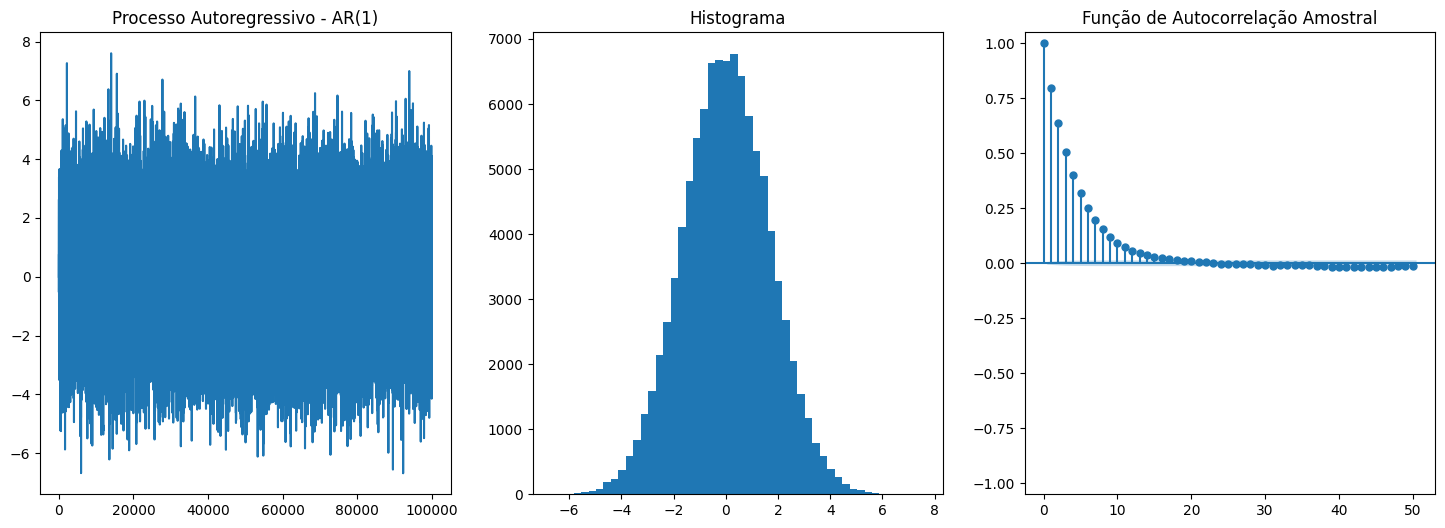

In [ ]:
plt.figure(figsize = (18, 6))

plt.subplot(1,3,1)
plt.plot(t, ZtAR)
plt.title('Processo Autoregressivo - AR(1)')

plt.subplot(1,3,2)
plt.hist(ZtAR, bins = 50)
plt.title('Histograma')

ax3 = plt.subplot(1,3,3)
plot_acf(ZtAR, lags = 50, title = 'Função de Autocorrelação Amostral', alpha = 0.05, ax = ax3)
plt.ylim(ymin=-1.05,ymax=1.05)

plt.show()

In [ ]:
print(f'A média de z(t): {np.mean(ZtAR):.2f}')
print(f'O desvio padrão é: {np.std(ZtAR):.2f}')

A média de z(t): 0.02
O desvio padrão é: 1.67


Nos processos autoregressivos de ordem 1 (AR(1)), a função de autocovariância é definida como:

$$\gamma_k = E[Z_tZ_{t-k}]$$

e pode ser expressa da seguinte forma:

$$\phi\gamma_{k-1} = \frac{\phi^k}{1 - \phi^2}\sigma^2_\epsilon$$

onde $k$ representa o número de defasagens (lags), ou seja, os passos anteriores do processo.

A **autocorrelação** é obtida a partir da relação:

$$\rho_k = \frac{\gamma_k}{\gamma_0} = \phi^k \enspace \text{, p/ k =1,2,3,...}$$

Lembrado que $\gamma_0$ corresponde à variância do processo.

## Testando a Estacionariedade:

In [ ]:
nsamples = len(ZtAR)
results = adfuller(ZtAR)

print()
print(f'Número de amostras: {nsamples}')
print(f'   Estatística ADF: {results[0]}')
print(f'           p-value: {results[1]}')
print(f'    Número de Lags: {results[2]}')
print()


for key, value in results[4].items():
  print('Valores Críticos:')
  print(f'  {key}: {value}')

print()
print(f'Resultado: A série temporal é {"não " if results[1] >= 0.05 else ""}estacionária.')
print()


Número de amostras: 100000
   Estatística ADF: -96.2215366120715
           p-value: 0.0
    Número de Lags: 2

Valores Críticos:
  1%: -3.4304153966406288
Valores Críticos:
  5%: -2.8615689042905816
Valores Críticos:
  10%: -2.5667853847424507

Resultado: A série temporal é estacionária.



## Série Autoregressiva de Ordens Superiores

In [ ]:
t = np.arange(0,1000,1)
n = len(t)

ZtAR_SO = np.zeros((n,1))

phi1 = 0.2
phi2 = 0.3
phi3 = -0.5

for i in range(3,n):
  ZtAR_SO[i] = phi1 * ZtAR_SO[i - 1] + phi2 * ZtAR_SO[i - 2] + phi3 * ZtAR_SO[i - 3] + random.gauss(0,1)

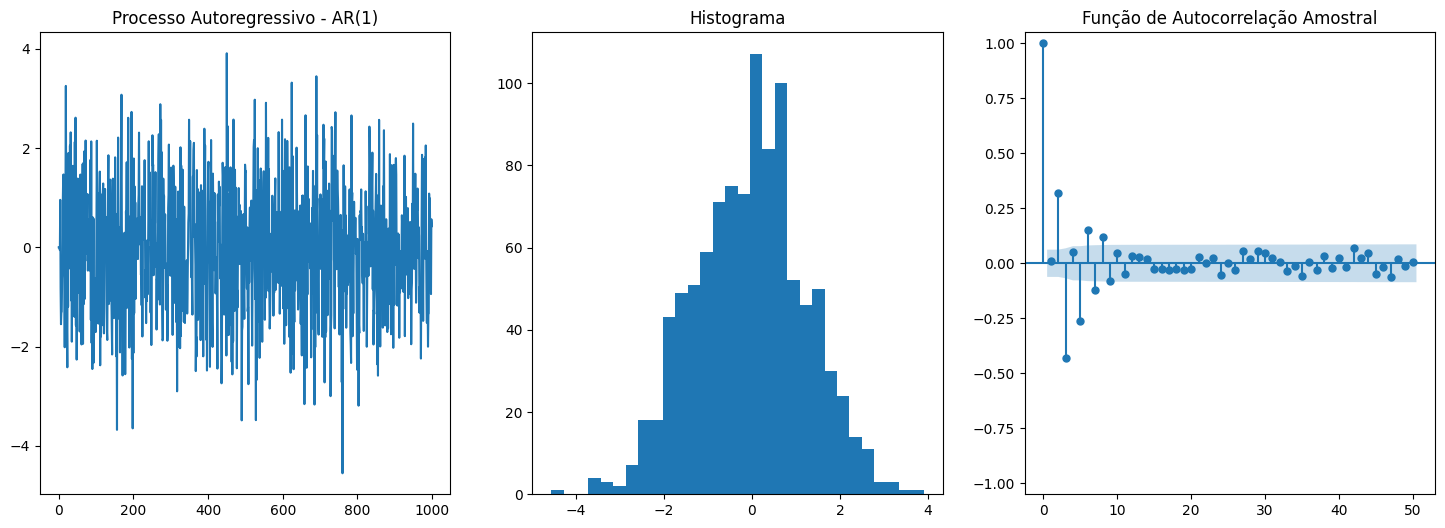

In [ ]:
plt.figure(figsize = (18, 6))

plt.subplot(1,3,1)
plt.plot(t, ZtAR_SO)
plt.title('Processo Autoregressivo - AR(1)')

plt.subplot(1,3,2)
plt.hist(ZtAR_SO, bins = 30)
plt.title('Histograma')

ax3 = plt.subplot(1,3,3)
plot_acf(ZtAR_SO, lags = 50, title = 'Função de Autocorrelação Amostral', alpha = 0.05, ax = ax3)
plt.ylim(ymin=-1.05,ymax=1.05)

plt.show()

Nos processos **autoregressivos de ordens superiores**, utilizamos as **equações de Yule-Walker** para simplificar o cálculo das funções de **autocovariância e autocorrelação**. Essas equações são definidas da seguinte forma:

Em um processo **AR(p)**:

$$Z_t = \phi_1Z_{t-1} + \phi_2Z_{t-2} + \dots + \phi_pZ_{t-p} + \epsilon_t$$

a autocorrelação satisfaz a relação:

$$\rho_k =\phi_1\rho_{k-1} + \phi_2\rho_{k-2} + \dots + \phi_p\rho_{k-p}\enspace ,k > 0$$

onde $\rho_0 = 1$.

Para determinar os valores iniciais de $\rho$, é necessário resolver um **sistema de $p$ equações**. Após a obtenção desses valores iniciais, os demais valores de $\rho_k$ podem ser calculados iterativamente.

O sistema de equações é dado por:

$$\begin{cases}
  \rho_1 = \phi_1\rho_0 + \phi_2\rho_{ 1 - 2} + \dots + \phi_p\rho_{1 - p} \\
  \rho_2 = \phi_1\rho_1 + \phi_2\rho_{ 2 - 2} + \dots + \phi_p\rho_{2 - p} \\
  \vdots \\
  \rho_k = \phi_1\rho_{k -1} + \phi_2\rho_{ k - 2} + \dots + \phi_p\rho_{k - p}
\end{cases}
$$

Além disso, a variância do processo pode ser calculada pela equação:

$$\gamma_0 = \frac{\sigma^2_{\epsilon}}{1 - \phi_1\rho_1 - \phi_2\rho_2 - \dots - \phi_p\rho_p}$$